In [1]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
from ast import literal_eval
from os.path import expanduser
import seaborn as sns
import os

In [3]:
plt.style.use('seaborn-whitegrid')

In [2]:
# df = pd.read_csv(expanduser('~/RE_Project/amj_ngrams/latest_listagg/np_stats.csv.gz'), index_col=0)
df_ = pd.read_csv(expanduser('~/data/jstor/stats/np_stats.csv.gz'), index_col=0)
df = df_.copy()

/Users/belikov/anaconda/envs/aa/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.shape

(1684658, 11)

In [4]:
df.head()

,np,doi,root,n_words,n_phrases,np_first_occ,root_first_occ,np_count.table,np_count.and_ig_ig,np_count.andnot_and_ig,np_count.andnot_andnot_and
0,"('business',)",10.1525/sop.2004.47.2.189,business,14374,683,0.134615,0.134615,0.0,2.0,0.0,4.0
1,"('table',)",10.1525/sop.2004.47.2.189,table,14374,683,0.165680,0.134615,0.0,2.0,0.0,0.0
2,"('respondent',)",10.1525/sop.2004.47.2.189,respondent,14374,683,0.029586,0.029586,1.0,2.0,2.0,37.0
3,"('majority',)",10.1525/sop.2004.47.2.189,majority,14374,683,0.031065,0.031065,0.0,1.0,0.0,9.0
4,"('man',)",10.1525/sop.2004.47.2.189,man,14374,683,0.062130,0.062130,0.0,1.0,0.0,43.0


In [5]:
dfc = df.groupby('doi').apply(lambda x: all(x['np_count.table'] == 0))

In [6]:
dfc.head()

doi
10.1086/210044    True
10.1086/210138    True
10.1086/210179    True
10.1086/210220    True
10.1086/210316    True
dtype: bool

In [7]:
sum(dfc)/dfc.shape[0]

0.5528626624517036

In [8]:
sum(df['np_count.table'] != 0)

18049

In [9]:
len(df.loc[df['np_count.table'] != 0, 'root'].unique())

3012

In [10]:
mask = ((df['np_count.andnot_and_ig'] != 0) | (df['np_count.and_ig_ig'] != 0) | (df['np_count.table'] != 0))
df = df.loc[mask].copy()
# df2.shape, df.shape

NameError: name 'df2' is not defined

In [12]:
#Remove papers without noun_phrases and get descriptive stats
mask_null = df['np'].isnull()
df1 = df.loc[~mask_null]
df1 = df1.dropna()

In [13]:
#Select variables for factor analysis
df2 = df[['np_first_occ','root_first_occ','np_count.table','np_count.and_ig_ig','np_count.andnot_and_ig','np_count.andnot_andnot_and']]
#Remove records with missing values
df2.head()

,np_first_occ,root_first_occ,np_count.table,np_count.and_ig_ig,np_count.andnot_and_ig,np_count.andnot_andnot_and
0,0.134615,0.134615,0.0,2.0,0.0,4.0
1,0.165680,0.134615,0.0,2.0,0.0,0.0
2,0.029586,0.029586,1.0,2.0,2.0,37.0
3,0.031065,0.031065,0.0,1.0,0.0,9.0
4,0.062130,0.062130,0.0,1.0,0.0,43.0


In [14]:
#Calculate correlations
df2.corr()

,np_first_occ,root_first_occ,np_count.table,np_count.and_ig_ig,np_count.andnot_and_ig,np_count.andnot_andnot_and
np_first_occ,1.000000,0.667219,-0.023609,-0.116872,-0.178234,-0.347520
root_first_occ,0.667219,1.000000,-0.000055,-0.054532,-0.129278,-0.234515
np_count.table,-0.023609,-0.000055,1.000000,-0.005923,0.006872,0.089593
np_count.and_ig_ig,-0.116872,-0.054532,-0.005923,1.000000,-0.080307,0.236160
np_count.andnot_and_ig,-0.178234,-0.129278,0.006872,-0.080307,1.000000,0.357275
np_count.andnot_andnot_and,-0.347520,-0.234515,0.089593,0.236160,0.357275,1.000000


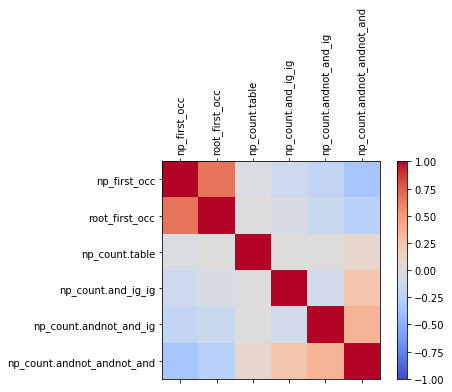

In [39]:
#Calculate and plot correlation coefficients
df1_corr = df2.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df1_corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df2.columns)
ax.set_yticklabels(df2.columns)
plt.show()

In [40]:
df2.columns

Index(['np_first_occ', 'root_first_occ', 'np_count.table',
       'np_count.and_ig_ig', 'np_count.andnot_and_ig',
       'np_count.andnot_andnot_and'],
      dtype='object')

In [42]:
#factor analysis
ccols = ['np_first_occ', 'root_first_occ', 'np_count.table',
       'np_count.and_ig_ig', 'np_count.andnot_and_ig']
df3 = df2[ccols].sample(50000)
df3 = df3.dropna()
fact_2c = FactorAnalysis(n_components=2)
df3_factor = fact_2c.fit_transform(df3)

[[ 0.18208894  0.12055478 -0.01531709 -0.17323887 -0.14029634]
 [ 0.00265888  0.00844189 -0.00536631  0.96736021 -0.11498755]]


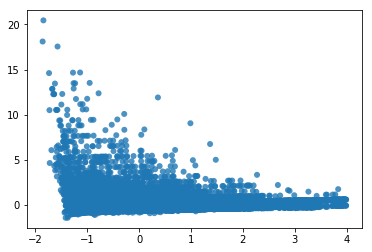

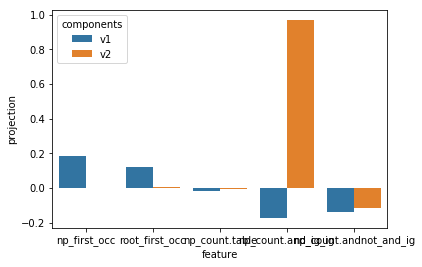

In [43]:
#Plot NPs in the factor space
plt.scatter(df3_factor[:,0], df3_factor[:,1], alpha=.8, edgecolors='none')
print(fact_2c.components_)
plt.show()
dfc = pd.DataFrame(fact_2c.components_.T, index=ccols, columns=['v1', 'v2']).unstack().reset_index()
dfc = dfc.rename(columns={'level_0': 'components', 'level_1': 'feature', 0: 'projection'})
sns.barplot(data=dfc, x='feature', y='projection', hue='components')

In [44]:
#factor analysis
ccols =['np_first_occ','root_first_occ','np_count.table','np_count.and_ig_ig', 'np_count.andnot_and_ig']
df3 = df2[ccols].sample(50000)
df3 = df3.dropna()
fact_2c = FactorAnalysis(n_components=2)
df3_factor = fact_2c.fit_transform(df3)

[[ 0.18250064  0.12074133 -0.01447649 -0.16898351 -0.1442181 ]
 [ 0.00238686  0.00843344 -0.00337946  0.96465189 -0.10568346]]


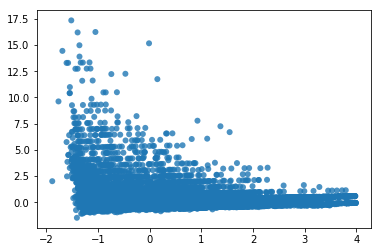

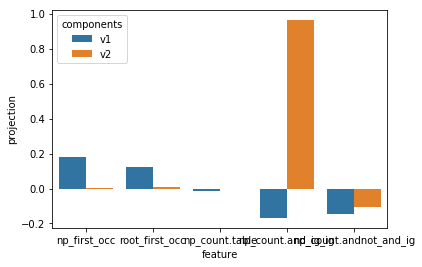

In [45]:
#Plot NPs in the factor space
plt.scatter(df3_factor[:,0], df3_factor[:,1], alpha=.8, edgecolors='none')
print(fact_2c.components_)
plt.show()
dfc = pd.DataFrame(fact_2c.components_.T, index=ccols, columns=['v1', 'v2']).unstack().reset_index()
dfc = dfc.rename(columns={'level_0': 'components', 'level_1': 'feature', 0: 'projection'})
sns.barplot(data=dfc, x='feature', y='projection', hue='components')

In [46]:
#factor analysis
ccols = ['np_count.table','np_count.and_ig_ig', 'np_count.andnot_and_ig']
df3 = df2[ccols].sample(50000)
df3 = df3.dropna()
fact_2c = FactorAnalysis(n_components=2)
df3_factor = fact_2c.fit_transform(df3)

[[-0.00335667  0.85179441 -0.07583137]
 [ 0.03150146  0.00994303  0.06341942]]


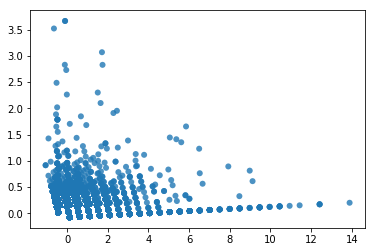

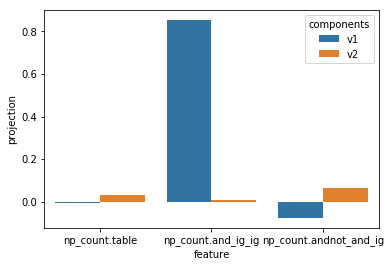

In [47]:
#Plot NPs in the factor space
plt.scatter(df3_factor[:,0], df3_factor[:,1], alpha=.8, edgecolors='none')
print(fact_2c.components_)
plt.show()
dfc = pd.DataFrame(fact_2c.components_.T, index=ccols, columns=['v1', 'v2']).unstack().reset_index()
dfc = dfc.rename(columns={'level_0': 'components', 'level_1': 'feature', 0: 'projection'})
sns.barplot(data=dfc, x='feature', y='projection', hue='components')

In [28]:
roots = df.root.unique()

In [29]:
roots.shape

(10332,)

In [30]:
# number of papers without candidates; number of papers
sum(df['np'].isnull()), len(df['doi'].unique())

(1256, 5694)

In [31]:
# df.loc[df['np'].isnull(), 'doi'].to_csv(expanduser('~/RE_Project/amj_ngrams/latest_listagg/empty_papers.csv'))

In [32]:
x = df['np_count.table']
y = df['np_count.and_ig_ig']

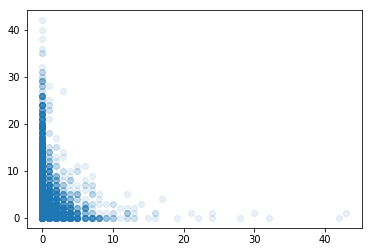

In [33]:
plt.scatter(x, y, alpha=0.1)
plt.show()

In [17]:
df2['np'] = df2['np'].apply(lambda x: literal_eval(x))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
mask_long = df2['np'].apply(lambda x: len(list(x)) > 1)
sum(mask_long)

1021494

In [19]:
df3 = df2.loc[mask_long]

In [20]:
x = df3['np_count.table']
y = df3['np_count.and_ig_ig']
plt.scatter(x, y, alpha=0.1, s=50)

In [16]:
x = df3['np_first_occ']
y = df3['np_count.and_ig_ig']
plt.scatter(x, y, alpha=0.1, s=10)
plt.show()

NameError: name 'df3' is not defined

In [19]:
lens = df2['np'].apply(lambda x: len(x))

In [20]:
lens.value_counts()

2     701299
1     661908
3     240656
4      57379
5      13851
6       4080
7       1555
8        838
9        485
10       340
11       236
12       183
13       122
14       103
15        68
16        54
17        48
18        39
19        32
20        25
22        17
21        13
25        11
23        10
24         9
26         6
27         6
29         6
31         3
28         3
32         3
30         2
33         2
34         2
41         2
40         1
44         1
54         1
36         1
35         1
68         1
Name: np, dtype: int64

In [21]:
df2[['np_count.table', 'np_count.and_ig_ig', 'np_count.andnot_and_ig', 'np_count.andnot_andnot_and']].corr()

,np_count.table,np_count.and_ig_ig,np_count.andnot_and_ig,np_count.andnot_andnot_and
np_count.table,1.000000,0.064921,0.088260,0.111242
np_count.and_ig_ig,0.064921,1.000000,0.230097,0.291361
np_count.andnot_and_ig,0.088260,0.230097,1.000000,0.388359
np_count.andnot_andnot_and,0.111242,0.291361,0.388359,1.000000


In [23]:
df2['np'].value_counts().head(50)

(table,)           3520
(study,)           3332
(result,)          3166
(research,)        2916
(hypothesis,)      2839
(organization,)    2838
(time,)            2749
(analysis,)        2748
(number,)          2712
(datum,)           2712
(example,)         2699
(relationship,)    2678
(effect,)          2629
(level,)           2453
(finding,)         2420
(difference,)      2370
(case,)            2344
(variable,)        2334
(type,)            2296
(way,)             2213
(addition,)        2173
(measure,)         2167
(term,)            2128
(work,)            2104
(group,)           2096
(model,)           2086
(individual,)      2077
(information,)     2035
(extent,)          2026
(question,)        1979
(factor,)          1944
(manager,)         1944
(year,)            1914
(percent,)         1910
(fact,)            1890
(theory,)          1886
(value,)           1884
(change,)          1882
(order,)           1881
(process,)         1862
(degree,)          1842
(use,)          

In [24]:
df2['root'].value_counts().head(50)

effect            18710
variable          16961
level             15121
relationship      13057
model             12285
study             12129
research          11464
analysis          10873
measure           10550
performance       10287
process            9857
firm               9617
organization       9600
group              9184
result             8480
theory             8242
behavior           8162
difference         8159
datum              8072
change             7903
hypothesis         7883
number             7848
value              7696
factor             7012
structure          6985
e                  6769
strategy           6119
characteristic     6038
work               5875
information        5754
member             5727
role               5693
decision           5633
manager            5571
support            5499
type               5470
system             5431
condition          5317
position           5218
finding            5160
size               5110
time            

In [27]:
df3['np'].value_counts().head(50)

(high, level)                    1354
(dependent, variable)            1228
(future, research)               1102
(independent, variable)          1025
(standard, deviation)             863
(control, variable)               805
(present, study)                  773
(previous, research)              760
(significant, difference)         753
(low, level)                      744
(large, number)                   630
(different, type)                 586
(positive, relationship)          575
(total, number)                   564
(significant, effect)             550
(main, effect)                    538
(positive, effect)                526
(dummy, variable)                 518
(job, satisfaction)               517
(p, p)                            475
(negative, effect)                468
(decision, making)                455
(previous, study)                 454
(interaction, term)               438
(standard, error)                 431
(high, degree)                    423
(prior, rese

In [29]:
df3['np'].value_counts().head(150).tail(50)

(social, structure)                211
(high, performance)                211
(adjusted, r2)                     211
(research, note)                   209
(high, value)                      206
(small, firm)                      206
(organizational, size)             206
(organizational, commitment)       206
(broad, range)                     205
(work, environment)                205
(performance, measure)             205
(future, study)                    205
(organizational, member)           204
(partial, support)                 202
(social, network)                  201
(response, rate)                   200
(helpful, comment)                 200
(significant, interaction)         197
(positive, association)            195
(similar, result)                  194
(organizational, theory)           193
(hypothesize, relationship)        193
(organizational, research)         192
(high, correlation)                191
(organizational, effectiveness)    189
(high, score)            